# 1.1 Introduction

# 1.2 Reference

# 2.1 Import library and data

import libeary that is used for the analysis

In [831]:
# data analysis and wrangling
import pandas as pd
from pandas import DataFrame
import numpy as np
import random as rnd
import math
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

# pipeline setup
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

Read the data into a pandas dataframe:

In [832]:
file_path_1 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5_project\\data\\Auto_Train_Dataset.csv')
file_path_2 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5_project\\data\\Auto_Data_Dictionary.csv')

In [833]:
autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape') 
autoloan_raw_df.head()

C:\Users\eggfr\AppData\Local\Temp\ipykernel_18944\4212711854.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.57,0.48,NaN,0.02,63.00,NaN,0
1,12138936,20250,1.00,0.00,1.00,NaN,0.00,15282,1826.55,Alone,...,Yes,Yes,Government,0.56,0.22,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.00,0.00,1.00,0.00,1.00,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.55,0.33,0.07,277.00,0.00,0
3,12188929,15750,0.00,0.00,1.00,1.00,0.00,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.14,0.63,NaN,1700.00,3.00,0
4,12133385,33750,1.00,0.00,1.00,0.00,2.00,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.51,0.30,0.36,0.20,674.00,1.00,0


There are 121856 rows and 40 variables in this dataset.

In [834]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [835]:
#BIKE = BIKE.astype({"season_1":'category', "temp":'int64'}) 
#autoloan_raw_df = autoloan_raw_df.astype ({"Credit_Amount":'float', "Loan_Annuity":'float'})
autoloan_raw_df['Client_Income'] = pd.to_numeric(autoloan_raw_df['Client_Income'], errors='coerce')
autoloan_raw_df['Credit_Amount'] = pd.to_numeric(autoloan_raw_df['Credit_Amount'], errors='coerce')
autoloan_raw_df['Loan_Annuity'] = pd.to_numeric(autoloan_raw_df['Loan_Annuity'], errors='coerce')
autoloan_raw_df['Age_Days'] = pd.to_numeric(autoloan_raw_df['Age_Days'], errors='coerce')
autoloan_raw_df['Employed_Days'] = pd.to_numeric(autoloan_raw_df['Employed_Days'], errors='coerce')
autoloan_raw_df['Registration_Days'] = pd.to_numeric(autoloan_raw_df['Registration_Days'], errors='coerce')
autoloan_raw_df['ID_Days'] = pd.to_numeric(autoloan_raw_df['ID_Days'], errors='coerce')
#autoloan_raw_df[] = autoloan_raw_df[].astype()
#autoloan_raw_df[] = autoloan_raw_df[].astype()
#autoloan_raw_df[] = autoloan_raw_df[].astype()
#autoloan_raw_df[] = autoloan_raw_df[].astype()
#autoloan_raw_df[] = autoloan_raw_df[].astype()

In [836]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

autoloan_raw_df.isna().sum()

# 2.2 Data Undestanding and Identifying Features and Target

Once the data is loaded into a pandas dataframe, the next step is identifying which columns represent features and which column represents the target. In this project, we are going to focus on classifying whether loans is defaulted using data collected from a project competition in Hackathon platform via kaggle, which can be found from this link.
https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon?select=Test_Dataset.csv

The page provides two datasets, TrainDataset and TestDataset. This model building is to be done on TrainDataset. Testdataset from the link isnt used as ['Default'] data is missing. 

In the test_train split section, we are going to assign X to be the features and y to be the target, which is the ['Default'] variable. Also, this is an  inbalanced dataset, around 8% loans is defaulted. 

There is 121856 total rows of data. There is 39 columns of features. The first column respondent_id is a unique and random identifier. The remaining 38 features are described in the data library desceiption. 

Amount of loan that is defaulted is shown below.


In [837]:
autoloan_raw_df['Default'].value_counts(normalize=True)

0   0.92
1   0.08
Name: Default, dtype: float64

In [838]:
autoloan_lib_raw_df = pd.read_csv(file_path_2,encoding='unicode_escape') 


Data library description is shown as below.

In [839]:
# let's take a look of the meaning of each columns
def left_align(df: DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df
left_align(autoloan_lib_raw_df)

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


# Initial Data Processing

Let's drop some unused feature. ID isnt going to be useful for the analysis. Own_house_Age, Social_Circle_Default','Score_Source_1','Score_Source_3' miss too many data, so they are going to be dropped. Type_Organization and Client_Income_Type has the same categories, and should be similar. We are going to drop Type_Organization to save computational power.

In [840]:
autoloan_raw_df = autoloan_raw_df.drop(columns=['ID','Own_House_Age','Social_Circle_Default','Score_Source_1','Score_Source_2','Score_Source_3','Type_Organization'], axis=1)

Datatype changing

Convert the following variabrles into numerical vairables. They are in object datatype because of missing value. Changing them into numerical form makes it easy to build the pipeline later, 

In [841]:
autoloan_raw_df['Client_Income'] = pd.to_numeric(autoloan_raw_df['Client_Income'], errors='coerce')
autoloan_raw_df['Credit_Amount'] = pd.to_numeric(autoloan_raw_df['Credit_Amount'], errors='coerce')
autoloan_raw_df['Loan_Annuity'] = pd.to_numeric(autoloan_raw_df['Loan_Annuity'], errors='coerce')
autoloan_raw_df['Age_Days'] = pd.to_numeric(autoloan_raw_df['Age_Days'], errors='coerce')
autoloan_raw_df['Employed_Days'] = pd.to_numeric(autoloan_raw_df['Employed_Days'], errors='coerce')
autoloan_raw_df['Registration_Days'] = pd.to_numeric(autoloan_raw_df['Registration_Days'], errors='coerce')
autoloan_raw_df['ID_Days'] = pd.to_numeric(autoloan_raw_df['ID_Days'], errors='coerce')
autoloan_raw_df['Population_Region_Relative'] = pd.to_numeric(autoloan_raw_df['Population_Region_Relative'], errors='coerce')


Convert the following variabrles into 'object type'. Despite being in integer form, we are going to convert it to object because these are categorical variables.

In [842]:
autoloan_raw_df['Application_Process_Day'] = autoloan_raw_df['Application_Process_Day'].astype('object')
autoloan_raw_df['Application_Process_Hour'] = autoloan_raw_df['Application_Process_Hour'].astype('object')

Convert the following categorical variabrles into 0 and 1, and it will make it easier to build the pipeline later

In [843]:
#autoloan_raw_df['Client_Gender'].replace({'Male': 0, 'Female': 1, 'XNA': nan}, inplace=True)
autoloan_raw_df['Client_Contact_Work_Tag'].replace({'No': 0, 'Yes': 1}, inplace=True) 
autoloan_raw_df['Client_Permanent_Match_Tag'].replace({'No': 0, 'Yes': 1}, inplace=True)


Removing Outlier

lets look at the distribution of the numerical data

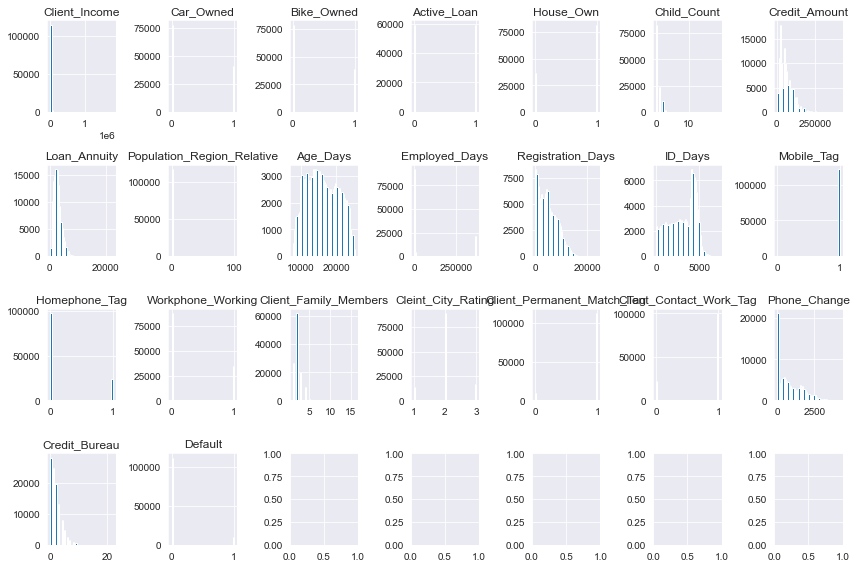

In [844]:
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

In [845]:
autoloan_raw_df['Client_Income'].describe()

count    118234.00
mean      16865.19
std       11538.15
min        2565.00
25%       11250.00
50%       14400.00
75%       20250.00
max     1800009.00
Name: Client_Income, dtype: float64

In [846]:
autoloan_raw_df['Population_Region_Relative'].describe()

count   116988.00
mean         0.02
std          0.41
min          0.00
25%          0.01
50%          0.02
75%          0.03
max        100.00
Name: Population_Region_Relative, dtype: float64

In [847]:
autoloan_raw_df['Credit_Bureau'].describe()

count   103316.00
mean         1.89
std          1.86
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         22.00
Name: Credit_Bureau, dtype: float64

In [848]:
upper = autoloan_raw_df.Population_Region_Relative.quantile(.99)
upper1 = autoloan_raw_df.Client_Income.quantile(.99)
upper2 = autoloan_raw_df.Credit_Bureau.quantile(.99)
autoloan_raw_df['Client_Income'] = autoloan_raw_df['Client_Income'].clip(upper=upper1)
autoloan_raw_df['Population_Region_Relative'] = autoloan_raw_df['Population_Region_Relative'].clip(upper=upper)
autoloan_raw_df['Credit_Bureau'] = autoloan_raw_df['Credit_Bureau'].clip(upper=upper2)

In [849]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

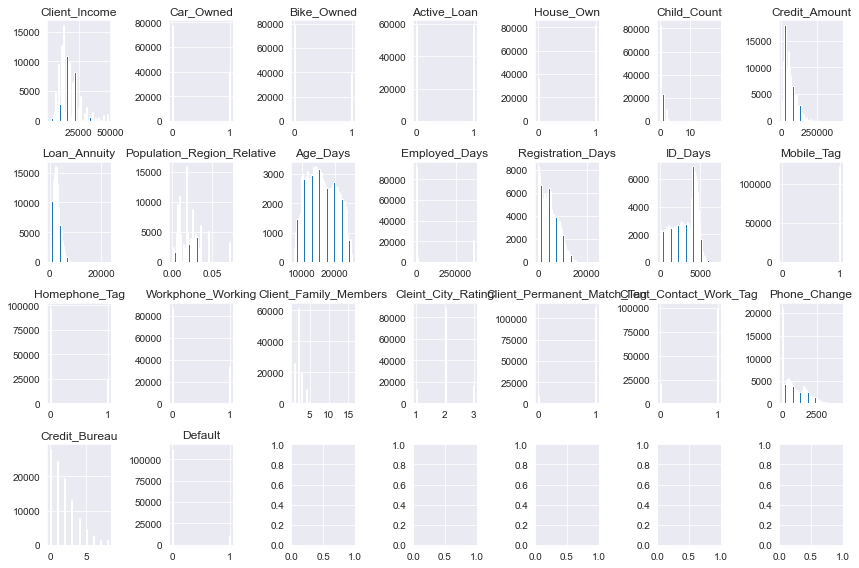

In [850]:
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

In [851]:
autoloan_raw_df['Credit_Bureau'].describe()

count   103316.00
mean         1.88
std          1.83
min          0.00
25%          0.00
50%          1.00
75%          3.00
max          8.00
Name: Credit_Bureau, dtype: float64

In [852]:
autoloan_raw_df['Population_Region_Relative'].describe()

count   116988.00
mean         0.02
std          0.01
min          0.00
25%          0.01
50%          0.02
75%          0.03
max          0.07
Name: Population_Region_Relative, dtype: float64

In [853]:
autoloan_raw_df.shape

(121856, 33)

Changing these categorical binary variable into 0 and 1

Drop Value

In [854]:
# autoloan_raw_df = autoloan_raw_df.drop(columns=['ID','Own_House_Age','Social_Circle_Default','Score_Source_1','Score_Source_2','Score_Source_3'], axis=1)

Separating data into training and testing sets is an important part of evaluating the models.Most of the data is used for training, and a smaller portion of the data is used for testing. For this analysis: we only split data into train and test. 75% of the data is for training and 25% for test. Also, the data split happened before we even do any EDA analysis to prevent data leakage. There is 91392 row of datas for the train set and 30464 rows of the data for test set before any data cleaning or analysis is done.

In [855]:
autoloan_raw_df

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Phone_Change,Credit_Bureau,Default
0,6750.00,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,Commercial,...,Sales,2.00,2.00,6.00,17.00,1,1,63.00,NaN,0
1,20250.00,1.00,0.00,1.00,NaN,0.00,15282.00,1826.55,Alone,Service,...,NaN,2.00,2.00,3.00,10.00,1,1,NaN,NaN,0
2,18000.00,0.00,0.00,1.00,0.00,1.00,59527.35,2788.20,Alone,Service,...,Realty agents,2.00,2.00,4.00,NaN,1,1,277.00,0.00,0
3,15750.00,0.00,0.00,1.00,1.00,0.00,53870.40,2295.45,Alone,Retired,...,NaN,2.00,3.00,2.00,15.00,1,1,1700.00,3.00,0
4,33750.00,1.00,0.00,1.00,0.00,2.00,133988.40,3547.35,Alone,Commercial,...,Laborers,4.00,1.00,3.00,NaN,1,1,674.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.00,0.00,0.00,NaN,1.00,0.00,107820.00,3165.30,Relative,Service,...,Laborers,2.00,2.00,4.00,16.00,1,0,0.00,1.00,1
121852,15750.00,0.00,1.00,1.00,0.00,0.00,104256.00,3388.05,Alone,Commercial,...,Sales,2.00,3.00,4.00,12.00,1,1,4.00,0.00,0
121853,8100.00,0.00,1.00,0.00,1.00,1.00,55107.90,2989.35,Alone,Govt Job,...,High skill tech,3.00,3.00,5.00,11.00,0,0,0.00,NaN,0
121854,38250.00,1.00,1.00,0.00,1.00,0.00,45000.00,2719.35,Alone,Service,...,Sales,2.00,2.00,1.00,12.00,1,1,0.00,2.00,0


# 4.1 Pre-processing and Exploratory Analysis

drop-list

convert categorical binary 

In [856]:
#y_train_df.replace({'functional': 0, 'functional needs repair': 1, 'non functional': 2}, inplace=True)


In [857]:
#columns_to_drop = ['date_recorded', 'longitude', 'latitude', 'num_private', 'region', 'wpt_name', 
 #                  'subvillage', 'ward', 'recorded_by', 'scheme_management', 'scheme_name', 
 #                  'extraction_type_group', 'extraction_type_class', 'management_group', 'payment', 
 #                  'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']

#X_train_df.drop(columns=columns_to_drop, inplace=True)

# Preview new dataframe
#X_train_df

In [858]:
autoloan_raw_df.isna().sum()

Client_Income                  3622
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour    

In [859]:
missing_fractions = autoloan_raw_df.isnull().mean().sort_values(ascending=False)
#missing_fractions = autoloan_raw_df.isnull().mean()
missing_fractions

Client_Occupation            0.34
Credit_Bureau                0.15
ID_Days                      0.05
Population_Region_Relative   0.04
Loan_Annuity                 0.04
Client_Income_Type           0.03
Client_Housing_Type          0.03
Employed_Days                0.03
Phone_Change                 0.03
Application_Process_Hour     0.03
House_Own                    0.03
Loan_Contract_Type           0.03
Client_Education             0.03
Child_Count                  0.03
Credit_Amount                0.03
Active_Loan                  0.03
Registration_Days            0.03
Bike_Owned                   0.03
Client_Income                0.03
Age_Days                     0.03
Car_Owned                    0.03
Client_Marital_Status        0.03
Application_Process_Day      0.02
Client_Gender                0.02
Client_Family_Members        0.02
Cleint_City_Rating           0.02
Accompany_Client             0.01
Mobile_Tag                   0.00
Homephone_Tag                0.00
Workphone_Work

There is missing value dataset, and lets f

# 4.1 ID

Are all the IDs unique?

In [860]:
#autoloan_raw_df['ID'].nunique()

In [861]:
pd.options.display.float_format = "{:.2f}".format

In [862]:
#autoloan_raw_df['ID'].describe()

They are all unique, however ID isnt useful for modeling and is dropped later.

# 4.2 Income

0.03% of Client_Income data has a missing value, and it is going to be replaced by the income average?, which is the most frequency method for the SimpleImputer when we set up the preprocessing pipeline

In [863]:
autoloan_raw_df['Client_Income'] = pd.to_numeric(autoloan_raw_df['Client_Income'], errors='coerce')
autoloan_raw_df['Client_Income'] = autoloan_raw_df['Client_Income'].fillna(0)
#x_train['Client_Income'] = pd.to_numeric(x_train['Client_Income'], errors='coerce')
#x_test['Client_Income'] = pd.to_numeric(x_test['Client_Income'], errors='coerce')

#autoloan_raw_df['Client_Income'] = autoloan_raw_df['Client_Income'].fillna(0)
#autoloan_raw_df['Client Income'] = autoloan_raw_df['Client_Income'].apply(lambda x: float(x))
#autoloan_raw_df['Client Income'] = autoloan_raw_df['Client Income'].astype(float).fillna(autoloan_raw_df['Client Income'].median())
#autoloan_raw_df[autoloan_raw_df.columns['Client_Income']] = autoloan_raw_df[autoloan_raw_df.columns['Client_Income']].apply(pd.to_numeric, errors='coerce').fillna(0)

In [864]:
autoloan_raw_df.isna().sum()

Client_Income                     0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour    

3.3 Car_Owned

0.03% of Car_Owned data has a missing value, and it is going to be replaced by the non Car_Owned, which is the most frequency method for the SimpleImputer when we set up the preprocessing pipeline

In [865]:
autoloan_raw_df['Car_Owned'].value_counts(normalize = True)

0.00   0.66
1.00   0.34
Name: Car_Owned, dtype: float64

In [866]:
#autoloan_raw_df['Car_Owned'] = autoloan_raw_df['Car_Owned'].fillna(0)


 3.4 Bike_Owned

0.03% of Bike_Owned data has a missing value, and it is going to be replaced by the non Bike_Owned, which is the most frequency method.

In [867]:
autoloan_raw_df['Bike_Owned'].value_counts(normalize = True)

0.00   0.67
1.00   0.33
Name: Bike_Owned, dtype: float64

In [868]:
#autoloan_raw_df['Bike_Owned'] = autoloan_raw_df['Bike_Owned'].fillna(0)


 3.5 Active_Loan

In [869]:
autoloan_raw_df['Active_Loan'].value_counts(normalize = True)

0.00   0.50
1.00   0.50
Name: Active_Loan, dtype: float64

0.03% of active loan data has a missing value, and it is going to be replaced by the mean of the default group.

In [870]:
autoloan_raw_df['Active_Loan'].value_counts(normalize = True)

0.00   0.50
1.00   0.50
Name: Active_Loan, dtype: float64

In [871]:
#autoloan_raw_df['Active_Loan'] = autoloan_raw_df['Active_Loan'].fillna(autoloan_raw_df.groupby('Default')['Active_Loan'].transform('mean'))

In [872]:
autoloan_raw_df.isna().sum()

Client_Income                     0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour    

In [873]:
#autoloan_raw_df['Client_Income'] = autoloan_raw_df['Client_Income'].fillna(autoloan_raw_df['Client_Income'].median())

In [874]:
autoloan_raw_df['Client_Occupation'].value_counts(normalize=True)

Laborers             0.26
Sales                0.15
Core                 0.13
Managers             0.10
Drivers              0.09
High skill tech      0.05
Accountants          0.05
Medicine             0.04
Security             0.03
Cooking              0.03
Cleaning             0.02
Private service      0.01
Low-skill Laborers   0.01
Secretaries          0.01
Waiters/barmen       0.01
Realty agents        0.00
HR                   0.00
IT                   0.00
Name: Client_Occupation, dtype: float64

3.6 House_Own

In [875]:
autoloan_raw_df['House_Own'].value_counts(normalize = True)

1.00   0.69
0.00   0.31
Name: House_Own, dtype: float64

0.03% of active loan data has a missing value, and it is going to be replaced by the mean of the default group.

3.7 Child_Count

In [876]:
autoloan_raw_df['Child_Count'].value_counts(normalize = True)

0.00    0.70
1.00    0.20
2.00    0.09
3.00    0.01
4.00    0.00
5.00    0.00
6.00    0.00
7.00    0.00
14.00   0.00
10.00   0.00
8.00    0.00
19.00   0.00
12.00   0.00
9.00    0.00
Name: Child_Count, dtype: float64

In [877]:
#autoloan_raw_df['Client_Occupation'] = autoloan_raw_df['Client_Occupation'].fillna(value ='Other')


In [878]:
autoloan_raw_df.isna().sum()

Client_Income                     0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour    

In [879]:
#autoloan_raw_df['Credit_Amount'] = autoloan_raw_df['Credit_Amount'].fillna(autoloan_raw_df['Credit_Amount'].mean)
#autoloan_raw_df['Loan_Annuity'] = autoloan_raw_df['Loan_Annuity'].fillna(autoloan_raw_df['Loan_Annuity'].mean)

In [880]:
#autoloan_raw_df['Loan_Annuity'] = autoloan_raw_df['Loan_Annuity'].fillna(autoloan_raw_df['Loan_Annuity'].mean)

In [881]:
#autoloan_raw_df['Credit_Amount'] = autoloan_raw_df['Credit_Amount'].fillna(autoloan_raw_df['Credit_Amount'].mean)

In [882]:
autoloan_raw_df.isna().sum()

Client_Income                     0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour    

In [883]:
autoloan_raw_df['Client_Income_Type'].value_counts(normalize = True)

Service           0.52
Commercial        0.23
Retired           0.18
Govt Job          0.07
Student           0.00
Unemployed        0.00
Maternity leave   0.00
Businessman       0.00
Name: Client_Income_Type, dtype: float64

In [884]:
autoloan_raw_df['Client_Education'].value_counts(normalize = True)

Secondary            0.71
Graduation           0.24
Graduation dropout   0.03
Junior secondary     0.01
Post Grad            0.00
Name: Client_Education, dtype: float64

Let's check our datatype and missing data type before we split our data.

In [885]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [886]:
autoloan_raw_df.isnull().mean().sort_values(ascending=False)

Client_Occupation            0.34
Credit_Bureau                0.15
ID_Days                      0.05
Population_Region_Relative   0.04
Loan_Annuity                 0.04
Client_Income_Type           0.03
Client_Housing_Type          0.03
Employed_Days                0.03
Phone_Change                 0.03
Application_Process_Hour     0.03
House_Own                    0.03
Loan_Contract_Type           0.03
Client_Education             0.03
Child_Count                  0.03
Credit_Amount                0.03
Active_Loan                  0.03
Registration_Days            0.03
Bike_Owned                   0.03
Age_Days                     0.03
Car_Owned                    0.03
Client_Marital_Status        0.03
Application_Process_Day      0.02
Client_Gender                0.02
Client_Family_Members        0.02
Cleint_City_Rating           0.02
Accompany_Client             0.01
Client_Permanent_Match_Tag   0.00
Client_Contact_Work_Tag      0.00
Client_Income                0.00
Workphone_Work

# Test Train Split

In [887]:
y = autoloan_raw_df['Default']
X = autoloan_raw_df.drop(columns=['Default'], axis=1)

In [888]:
#create train-test set using 75%-25% ratio for the train set and test set and set the random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,stratify=y,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((91392, 32), (30464, 32), (91392,), (30464,))

# Pipeline

Now we need to set a pipeline for our data with the imputing staregy from the discussion above. We will set up a numeric pipeline for numerical variable. Feautres with missing value will be imputed by mean. Afterwards, it will be fed into a standard scaler for scaling.

In [889]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91392 entries, 64390 to 83907
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               91392 non-null  float64
 1   Car_Owned                   88721 non-null  float64
 2   Bike_Owned                  88682 non-null  float64
 3   Active_Loan                 88649 non-null  float64
 4   House_Own                   88650 non-null  float64
 5   Child_Count                 88673 non-null  float64
 6   Credit_Amount               88682 non-null  float64
 7   Loan_Annuity                87776 non-null  float64
 8   Accompany_Client            90079 non-null  object 
 9   Client_Income_Type          88604 non-null  object 
 10  Client_Education            88626 non-null  object 
 11  Client_Marital_Status       88796 non-null  object 
 12  Client_Gender               89569 non-null  object 
 13  Loan_Contract_Type         

I am going to make a list of the following categorical variable so I can prepare a list for the feature for the one hot encoding.

In [890]:
print("Accompany_Client")
print(x_train.Accompany_Client.unique())

print("Client_Income_Type")
print(x_train.Client_Income_Type.unique())

print("Client_Education") 
print(x_train.Client_Education.unique())

print("Client_Marital_Status")
print(x_train.Client_Marital_Status.unique())

print("Client_Gender")
print(x_train.Client_Gender.unique())


print("Client_Housing_Type")
print(x_train.Client_Housing_Type.unique())

print("Client_Occupation")
print(x_train.Client_Occupation.unique())


print("Loan_Contract_Type")
print(x_train.Loan_Contract_Type.unique())

print("Type_Organization")
print(x_train.Client_Income_Type.unique())

Accompany_Client
['Alone' 'Partner' 'Relative' nan 'Kids' 'Others' 'Group' '##']
Client_Income_Type
['Service' 'Commercial' nan 'Govt Job' 'Retired' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education
['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
Client_Marital_Status
['M' 'S' 'W' nan 'D']
Client_Gender
['Female' 'Male' nan 'XNA']
Client_Housing_Type
['Home' 'Family' 'Municipal' 'Office' nan 'Shared' 'Rental']
Client_Occupation
['Laborers' 'Sales' nan 'Drivers' 'Accountants' 'Managers' 'Core'
 'Security' 'Secretaries' 'Medicine' 'Cleaning' 'High skill tech'
 'Cooking' 'Low-skill Laborers' 'Private service' 'Waiters/barmen' 'IT'
 'HR' 'Realty agents']
Loan_Contract_Type
['CL' nan 'RL']
Type_Organization
['Service' 'Commercial' nan 'Govt Job' 'Retired' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']


In [891]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91392 entries, 64390 to 83907
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               91392 non-null  float64
 1   Car_Owned                   88721 non-null  float64
 2   Bike_Owned                  88682 non-null  float64
 3   Active_Loan                 88649 non-null  float64
 4   House_Own                   88650 non-null  float64
 5   Child_Count                 88673 non-null  float64
 6   Credit_Amount               88682 non-null  float64
 7   Loan_Annuity                87776 non-null  float64
 8   Accompany_Client            90079 non-null  object 
 9   Client_Income_Type          88604 non-null  object 
 10  Client_Education            88626 non-null  object 
 11  Client_Marital_Status       88796 non-null  object 
 12  Client_Gender               89569 non-null  object 
 13  Loan_Contract_Type         

In [892]:
Client_Education_list = ['Junior secondary','Secondary','Graduation dropout','Graduation','Post Grad']
Client_Marital_Status_list = ['D','W','M','S']

In [893]:
ordinal_Client_Education_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Education_list])),
    ('ordnorm', StandardScaler())])

In [894]:
ordinal_Client_Marital_Status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Marital_Status_list])),
    ('ordnorm', StandardScaler())])

In [895]:
nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

In [896]:
nominal_Client_Occupation_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

In [897]:
numeric_pipeline = Pipeline([
    ('numimputer', SimpleImputer(strategy = 'mean')), 
    ('numnorm', StandardScaler())])

In [898]:
#class NameDropper (BaseEstimator, TransformerMixin):
  #  def

In [899]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91392 entries, 64390 to 83907
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               91392 non-null  float64
 1   Car_Owned                   88721 non-null  float64
 2   Bike_Owned                  88682 non-null  float64
 3   Active_Loan                 88649 non-null  float64
 4   House_Own                   88650 non-null  float64
 5   Child_Count                 88673 non-null  float64
 6   Credit_Amount               88682 non-null  float64
 7   Loan_Annuity                87776 non-null  float64
 8   Accompany_Client            90079 non-null  object 
 9   Client_Income_Type          88604 non-null  object 
 10  Client_Education            88626 non-null  object 
 11  Client_Marital_Status       88796 non-null  object 
 12  Client_Gender               89569 non-null  object 
 13  Loan_Contract_Type         

In [900]:
#for item in three_per:
    #autoloan_raw_df[item] = autoloan_raw_df[item].fillna(0)
    #autoloan_raw_df[item] = autoloan_raw_df[item].astype(int)

In [901]:

num_cols = list(x_train.select_dtypes(['int', 'float']).columns)
ohe_cols = list(x_train.select_dtypes('object').columns)
ohe_cols.remove('Client_Occupation')

In [902]:
ohe_cols

['Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Application_Process_Day',
 'Application_Process_Hour']

In [903]:
num_cols

['Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Phone_Change',
 'Credit_Bureau']

In [904]:
ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_Client_Education_pipeline, ['Client_Education']),
       ("ordinalpipe2", ordinal_Client_Marital_Status_pipeline, ['Client_Marital_Status']),
       #("ordinalpipe3", ordinal_emp_status_pipeline, ['employment_status']),
       #("ordinalpipe4", ordinal_edu_pipeline, ['education']),
       #("ordinalpipe5", ordinal_census_pipeline, ['census_msa']),
       #("ordinalpipe6", ordinal_hhs_pipeline, ['hhs_geo_region']),
       ("nominalpipe", nominal_pipeline,ohe_cols),
       ("nominalpipe2", nominal_Client_Occupation_pipeline,['Client_Occupation']),
       #("nominalpipe3", nominal_doc_rec_pipeline,['doctor_recc_h1n1']),
       ("numpipe", numeric_pipeline, num_cols)])
    

In [905]:
x_train_clean = pd.DataFrame(ct.fit_transform(x_train))
x_train_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,-0.57,0.05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.66,0.00,-0.50,-0.63,-0.17,-0.06,0.29,0.47,-1.18,-1.12
1,1.74,0.05,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,...,-1.07,0.00,-0.50,-0.63,-0.17,-2.06,-3.46,-2.14,-0.83,0.07
2,-0.57,1.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.20,0.00,-0.50,-0.63,-1.28,-0.06,0.29,0.47,-0.62,0.00
3,-0.57,-1.46,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.98,0.00,-0.50,1.60,-1.28,-0.06,0.29,0.47,-0.99,-1.12
4,1.74,1.56,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-1.25,0.00,-0.50,-0.63,-1.28,1.95,-3.46,0.47,-0.55,-0.53


# Baseline Model

In [906]:
steps=[('preprocessing', ct), 
       ('classifier', DummyClassifier(strategy='most_frequent'))]

In [907]:
baseline_pipe = Pipeline(steps)

In [908]:
baseline_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['Junior '
                                                                                               'secondary',
                                                                                               'Secondary',
                                                                                               'Graduation '
                                                                                               'dropout',
                                                                                               'Gr

In [909]:
y_pred0= baseline_pipe.predict(x_test)

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


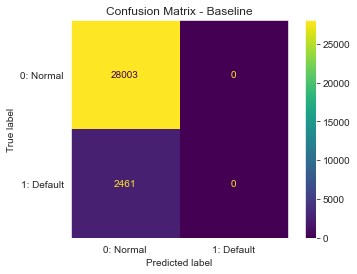

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28003
           1       0.00      0.00      0.00      2461

    accuracy                           0.92     30464
   macro avg       0.46      0.50      0.48     30464
weighted avg       0.84      0.92      0.88     30464



C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [910]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(baseline_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Baseline')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred0)
print(baseline_classification_report)

In [911]:
print(baseline_pipe.score(x_train,y_train))
print(baseline_pipe.score(x_test,y_test))

0.9192051820728291
0.9192161239495799


In [912]:
steps = [('preprocess', ct),
            ('logreg',
                       LogisticRegression(random_state=42))]

model1_pipe = Pipeline(steps)

In [913]:
model1_pipe.fit(x_train,y_train)

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['Junior '
                                                                                               'secondary',
                                                                                               'Secondary',
                                                                                               'Graduation '
                                                                                               'dropout',
                                                                                               'Gradu

In [914]:
y_pred = model1_pipe.predict(x_test)

Accuracy is :91.92161239495799
precision is :0.0

AUC is :0.5

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


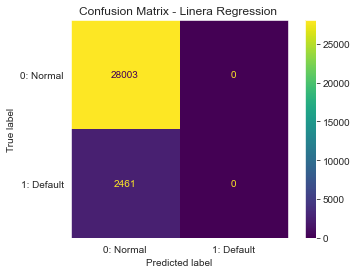

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28003
           1       0.00      0.00      0.00      2461

    accuracy                           0.92     30464
   macro avg       0.46      0.50      0.48     30464
weighted avg       0.84      0.92      0.88     30464



C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [915]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

pre = precision_score(y_test,y_pred) * 100
print('precision is :{0}'.format(pre))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model1_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Linera Regression ')
plt.show()
logreg_classification_report = classification_report(y_test, y_pred)
print(logreg_classification_report)

In [916]:
print(model1_pipe.score(x_train,y_train))
print(model1_pipe.score(x_test,y_test))

0.9192051820728291
0.9192161239495799


In [917]:
#ordi =OrdinalEncoder(categories=[Client_Education_list])

In [918]:
#x_train['Client_Education'] = x_train['Client_Education'].fillna(value = 'Secondary')

In [919]:
#ordi.fit(x_train[['Client_Education']])

In [920]:
#x_train['Client_Education']

In [921]:
#pd.DataFrame(ordi.transform(x_train[['Client_Education']]))